<a href="https://colab.research.google.com/github/Sahil9424r/DS_assignment/blob/main/DS_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time

In [47]:
d1=pd.read_csv("fear_greed_index.csv")
d2=pd.read_csv("historical_data.csv")

In [75]:
d1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [76]:
d2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12


However, upon analyzing the two datasets:

The Fear & Greed Index dataset contains data from early 2018.

The Trader Behavior dataset contains trading activity from 2024.

As a result, there is no date overlap between the two datasets. This means a meaningful merge operation on the 'date' column would result in zero matched rows.

In [77]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     79225 non-null   datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [78]:
d2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,131999
Start Position,0
Direction,0
Closed PnL,0


as date and timestamp IST has so much Null values so we can drop both col as there is no need of it

In [80]:
d2.drop(columns=['date','Timestamp IST'],inplace=True)

In [82]:
d2.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Start Position,0
Direction,0
Closed PnL,0
Transaction Hash,0


No null values

In [83]:
d2.duplicated().sum()

np.int64(0)

no dupliactes

In [84]:
d2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Account and Transaction Hash are not needed for our observation

In [87]:
d=d2.copy()

In [88]:
d.drop(columns=['Account','Transaction Hash'],inplace=True)

In [89]:
d.head(2)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Trade ID,timestamp
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,52017706630,True,0.005600,4.430000e+14,1.730000e+12


In [90]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             211224 non-null  object 
 1   Execution Price  211224 non-null  float64
 2   Size Tokens      211224 non-null  float64
 3   Size USD         211224 non-null  float64
 4   Side             211224 non-null  object 
 5   Start Position   211224 non-null  float64
 6   Direction        211224 non-null  object 
 7   Closed PnL       211224 non-null  float64
 8   Order ID         211224 non-null  int64  
 9   Crossed          211224 non-null  bool   
 10  Fee              211224 non-null  float64
 11  Trade ID         211224 non-null  float64
 12  timestamp        211224 non-null  float64
dtypes: bool(1), float64(8), int64(1), object(3)
memory usage: 19.5+ MB


In [97]:
d.drop(columns=['Trade ID','Order ID'],inplace=True)

In [107]:
d.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,timestamp,profit_ratio
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,211224.000000,2.112240e+05,211181.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,1.163967,1.737744e+12,0.018995
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,6.758854,8.689920e+09,0.845813
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,1.680000e+12,-384.406426
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,0.016121,1.740000e+12,0.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,0.089578,1.740000e+12,0.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,0.393811,1.740000e+12,0.010323
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,1.750000e+12,3.403550


In [98]:
d.head(2)

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,timestamp
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,1.730000e+12
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,1.730000e+12


Market Sentiment Analysis (Dataset: d1)

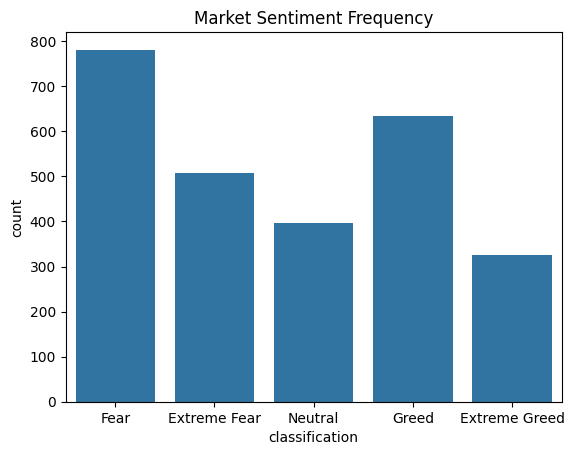

In [121]:
sns.countplot(data=d1, x='classification')
plt.title("Market Sentiment Frequency")
plt.savefig("outputs/market_sentiment_frequency.png")
plt.show()

Fear is most among traders and Extreme Greed is least

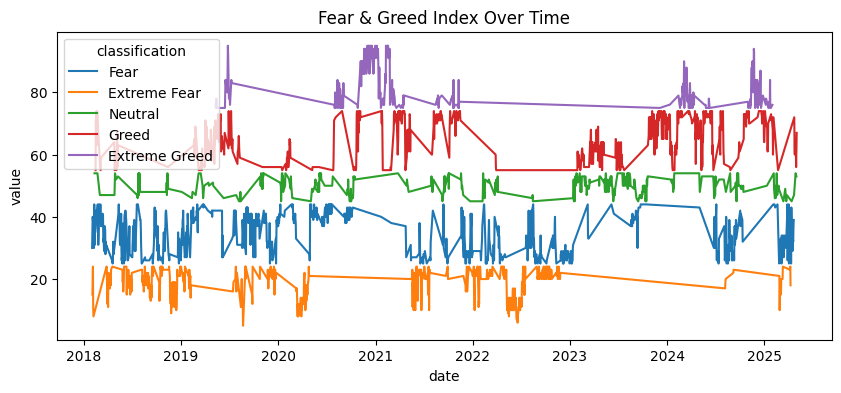

In [122]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=d1, x='date', y='value', hue='classification')
plt.title("Fear & Greed Index Over Time")
plt.savefig("outputs/fear_greed_over_time.png")
plt.show()

Trader Behavior Analysis (Dataset: d2)

d is copy of d2 so i wiil show d

 Profitability (PnL)

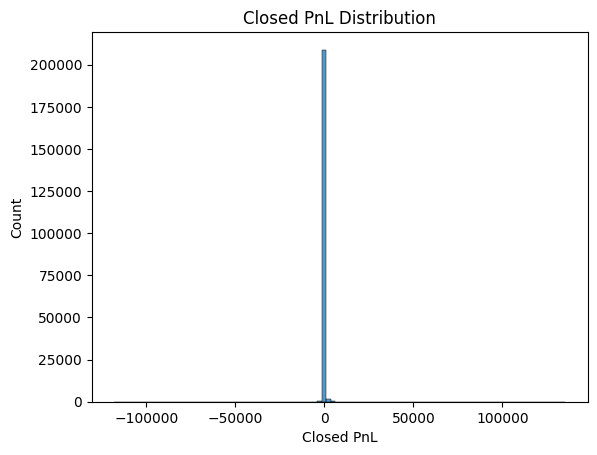

In [123]:
sns.histplot(d['Closed PnL'], bins=100)
plt.title("Closed PnL Distribution")
plt.savefig("outputs/closed_pnl_distribution.png")
plt.show()


Risk (Profit per dollar)

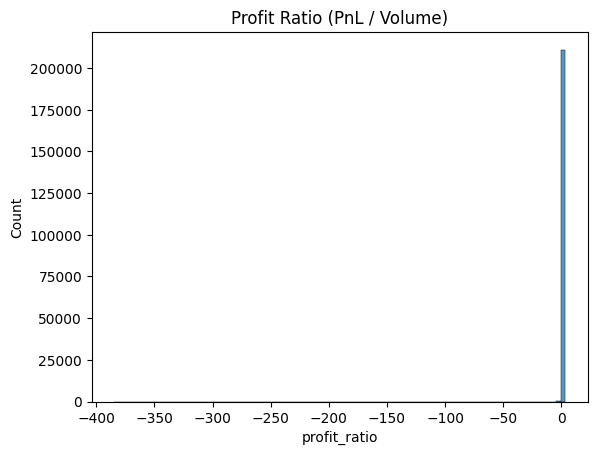

In [124]:
d['profit_ratio'] = d['Closed PnL'] / d['Size USD']
sns.histplot(d['profit_ratio'], bins=100)
plt.title("Profit Ratio (PnL / Volume)")
plt.savefig("outputs/profit_ratio_distribution.png")
plt.show()


Volume Category

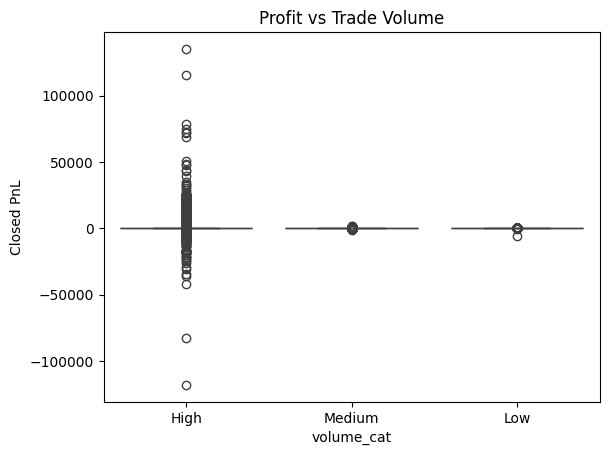

In [125]:
d['volume_cat'] = d['Size USD'].apply(lambda usd: 'Low' if usd < 100 else ('Medium' if usd < 1000 else 'High'))
sns.boxplot(data=d, x='volume_cat', y='Closed PnL')
plt.title("Profit vs Trade Volume")
plt.savefig("outputs/profit_vs_volume.png")
plt.show()


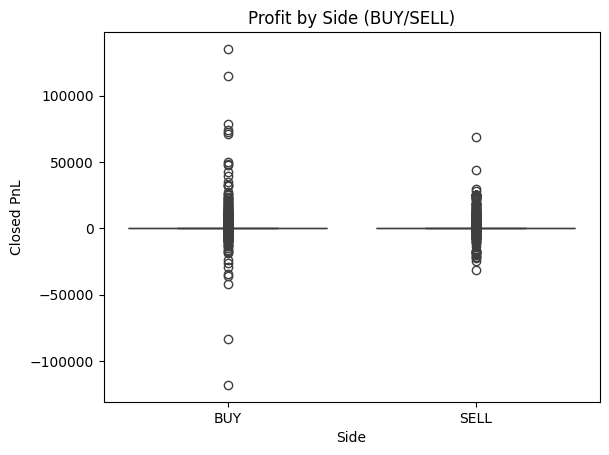

In [126]:
sns.boxplot(data=d, x='Side', y='Closed PnL')
plt.title("Profit by Side (BUY/SELL)")
plt.savefig("outputs/profit_by_side.png")
plt.show()


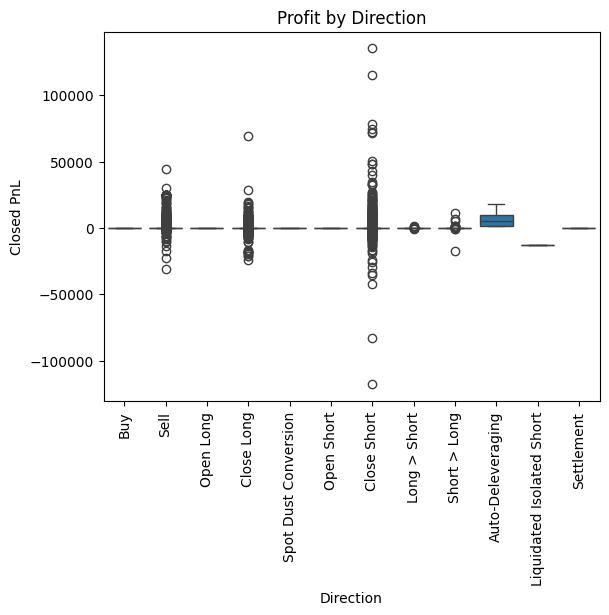

In [127]:
sns.boxplot(data=d, x='Direction', y='Closed PnL')
plt.title("Profit by Direction")
plt.xticks(rotation=90)
plt.savefig("outputs/profit_by_direction.png")
plt.show()


Leverage or Risk (Proxies)

1. Use Profit Ratio

In [114]:
d['profit_ratio'] = d['Closed PnL'] / d['Size USD']

If this ratio is high, it might indicate:

High risk

High leverage



Text(0.5, 1.0, 'Profit Ratio (PnL / Size USD)')

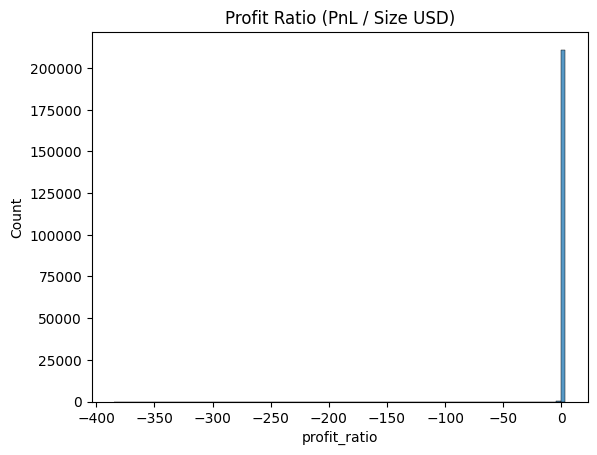

In [116]:
sns.histplot(d['profit_ratio'], bins=100)
plt.title("Profit Ratio (PnL / Size USD)")

2. Use Position Change

In [117]:
d['position_change'] = d['Size Tokens'] - d['Start Position']

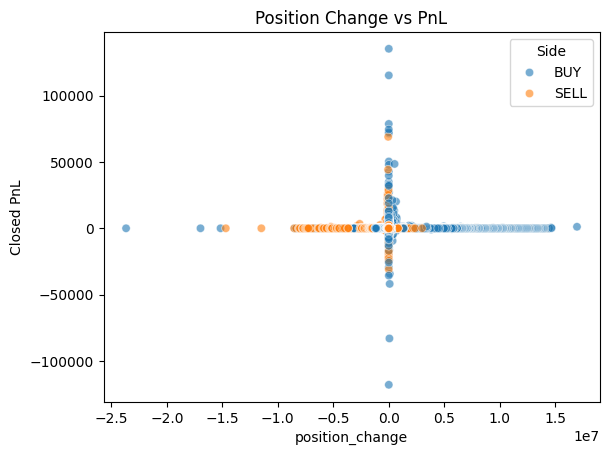

In [128]:
d['position_change'] = d['Size Tokens'] - d['Start Position']
sns.scatterplot(data=d, x='position_change', y='Closed PnL', hue='Side', alpha=0.6)
plt.title("Position Change vs PnL")
plt.savefig("outputs/position_change_vs_pnl.png")
plt.show()
